In [2]:
from pathlib import Path
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from AAI import Antipsor, insideInteg
from block import genMdBlock, genColBlock, genTimeBlock, genMdTimeBlock 
from convertUnit import deFrontZero, MdToDay, timeToMins, effTilT

In [15]:
dName = 'dat_full'
print (Path.cwd())
filesInPath = [child for child in (Path.cwd() / dName).iterdir()] #list of file path in dat_full

C:\Users\ASUS\Dropbox\Senior Project Bank\code_result


In [16]:
#['0610_0759, '.._0959', '.._1159', '.._1359', '.._1559']
time0610 =  9918 + 12*np.arange(5)
print ([filesInPath[i].stem for i in time0610])

['20160610_0759_spec', '20160610_0959_spec', '20160610_1159_spec', '20160610_1359_spec', '20160610_1559_spec']


In [17]:
with open(filesInPath[0], 'r') as f:
    print (np.around(insideInteg(list(f)), decimals=3))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
time0404 = 4799 + 12*np.arange(5)
print ([filesInPath[i].stem for i in time0404])

['20160404_0759_spec', '20160404_0959_spec', '20160404_1159_spec', '20160404_1359_spec', '20160404_1559_spec']


In [48]:
time1204 = 22879 + 12*np.arange(5)
print ([filesInPath[i].stem for i in time1204])

['20161204_0759_spec', '20161204_0959_spec', '20161204_1159_spec', '20161204_1359_spec', '20161204_1559_spec']


In [36]:
def plotIrrSameDay(timeI, name):

    for i in timeI:  #loop

        xlines, ylines = [], [] # print (file[20:-20])

        with open(filesInPath[i], 'r') as f:
        
            print (filesInPath[i].stem)
        
            for str_line in list(f)[:-1]: #only care from 280 to 399
            
                if str_line.strip(): # only pass if line is not blank
                
                    list_line = str_line.split() # make sample list, strip '\n' in trialling
                
                    xlines.append(float(list_line[0])) # x is our uv lamda 
                    ylines.append(float(list_line[1])/1000) # y is its Irradiance,
                                                   # I suspect that data is in unit milli-W/(m^2 *nm)
                    
            plt.plot(xlines, ylines, label=filesInPath[i].stem[:-5])
        
        plt.title('Spectral Irradiance on '+ name +' with 5 different time')
        plt.xlabel('Wavelength(lambda)'); plt.ylabel('Irradiance (Wm^-2)')
        plt.axvspan(295,313, alpha=0.5, color='gold')
        plt.legend(fontsize='small')
        plt.savefig(Path.cwd() / 'result' / 'spectrum' / name)
        



20161204_0759_spec
20161204_0959_spec
20161204_1159_spec
20161204_1359_spec
20161204_1559_spec


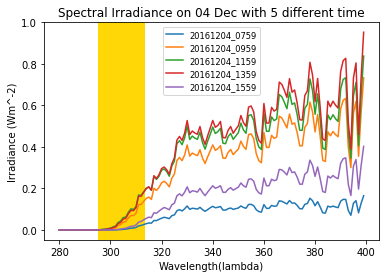

In [49]:
plotIrrSameDay(time1204, '04 Dec')

20160404_0759_spec
20160404_0959_spec
20160404_1159_spec
20160404_1359_spec
20160404_1559_spec


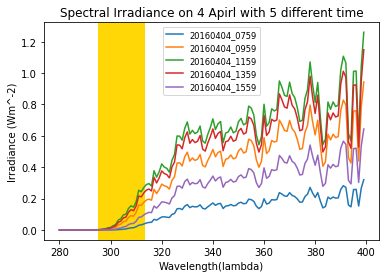

In [41]:
plotIrrSameDay(time0404, '4 Apirl')

In [77]:
# [0412_1159, 0612_1159, 0812_1159]
time_1159 = [5165, 10112, 15183, 18803, 23570]
print ([filesInPath[i].stem for i in time_1159])

['20160412_1159_spec', '20160612_1159_spec', '20160812_1159_spec', '20161012_1159_spec', '20161212_1159_spec']
20160412_0859_spec


In [95]:
time_1559 = [i+24 for i in time_1159]
print ([filesInPath[i].stem for i in time_1559])

['20160412_1559_spec', '20160612_1559_spec', '20160812_1559_spec', '20161012_1559_spec', '20161212_1559_spec']


In [74]:
def plotIrrDiffDays(timeII, name):
    
    for i in timeII:  #loop

        xlines, ylines = [], [] # print (file[20:-20])

        with open(filesInPath[i], 'r') as f:
        
            print (filesInPath[i].stem)
        
            for str_line in list(f)[:-1]: #only care from 280 to 399
            
                if str_line.strip(): # only pass if line is not blank
                
                    list_line = str_line.split() # make sample list, strip '\n' in trialling
                
                    xlines.append(float(list_line[0])) # x is our uv lamda 
                    ylines.append(float(list_line[1])/1000) # y is its Irradiance,
                                                   # I suspect that data is in unit milli-W/(m^2 *nm)
                    
            plt.plot(xlines, ylines, label=filesInPath[i].stem[:-5])
        
        plt.title('Spectral Irradiance at '+ name +' on 5 different days')
        plt.xlabel('Wavelength(lambda)'); plt.ylabel('Irradiance (Wm^-2)')
        plt.legend(fontsize='small')
        plt.axvspan(295,313, alpha=0.5, color='gold')
        fname = name + '.png'
        plt.savefig(Path.cwd() / 'result' / 'spectrum'/ fname)
        

20160412_1559_spec
20160612_1559_spec
20160812_1559_spec
20161012_1559_spec
20161212_1559_spec


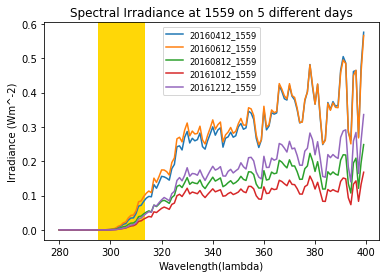

In [96]:
plotIrrDiffDays(time_1559, '1559')

In [10]:
br = 'smooth'
does = pd.read_hdf(Path.cwd() / 'result'/ 'does' /br/'does.h5')

In [24]:
does.iloc[0:10, 0:4]

,0900-0930,0930-1000,1000-1030,1030-1100
0206,0.27,0.40,0.60,0.77
0207,0.27,0.40,0.60,0.77
0208,0.25,0.35,0.53,0.69
0209,0.27,0.39,0.59,0.77
0210,0.26,0.39,0.58,0.76
0211,0.27,0.39,0.59,0.78
0212,0.27,0.40,0.58,0.77
0213,0.27,0.39,0.58,0.77
0214,0.26,0.38,0.56,0.72
0215,0.27,0.40,0.57,0.75


In [88]:
sample = does.iloc[4:9,-1]
print (sample)
sample.mean()

0210    0.10
0211    0.10
0212    0.10
0213    0.11
0214    0.11
Name: 1630-1700, dtype: float64


0.10400000000000001

In [28]:
summer = does.iloc[23:176, 0:4] #Summer season (9.00-11.00)
summer.loc[:, 'Total'] = summer.sum(axis=1)
print (summer)

      0900-0930  0930-1000  1000-1030  1030-1100  Total
0301       0.29       0.44       0.61       0.79   2.13
0302       0.30       0.45       0.64       0.82   2.21
0303       0.33       0.50       0.70       0.87   2.40
0304       0.33       0.51       0.71       0.91   2.46
0305       0.33       0.52       0.72       0.92   2.49
0306       0.34       0.53       0.75       0.96   2.58
0307       0.32       0.52       0.73       0.94   2.51
0308       0.33       0.53       0.75       0.95   2.56
0309       0.33       0.52       0.75       0.96   2.56
0310       0.32       0.51       0.73       0.95   2.51
0311       0.32       0.50       0.73       0.94   2.49
0312       0.34       0.52       0.75       0.97   2.58
0313       0.33       0.51       0.73       0.95   2.52
0314       0.36       0.53       0.75       0.96   2.60
0315       0.34       0.50       0.71       0.92   2.47
0316       0.31       0.47       0.68       0.87   2.33
0317       0.30       0.44       0.63       0.81

In [50]:
X = np.arange(0, len(summer.index))
summer.iloc[[0, 31, 61, 92, 122, len(summer.index)-1]]
print (X)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152]


C:\Users\ASUS\Miniconda3\lib\site-packages\matplotlib\axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
C:\Users\ASUS\Miniconda3\lib\site-packages\matplotlib\axis.py:1096: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


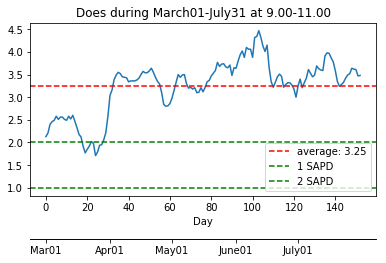

In [103]:
fig = plt.figure()
ax1 = fig.add_axes((0.1,0.3,0.8,0.6)) # create an Axes with some room below

X = np.arange(0., float(len(summer.index))) 
Y = summer.iloc[:, -1].values #The Total Column
ax1.plot(X,Y) 
ax1.set_xlabel('Day')
ax1.set_title('Does during March01-July31 at 9.00-11.00')
avgY = np.around(np.mean(Y), decimals=2) 
# print (avgY)
ax1.axhline(avgY, label='average: '+str(avgY),linestyle='--', color='r')
ax1.axhline(1.0, label='1 SAPD',linestyle='--', color='green')
ax1.axhline(2.0, label='2 SAPD', linestyle='--',color='g')
ax1.legend()

# create second Axes. Note the 0.0 height

ax2 = fig.add_axes((0.1,0.15,0.8,0.0))
ax2.yaxis.set_visible(False) # hide the yaxis

new_tick_locations = np.array([0., 31., 61., 92., 122.])
new_lables = ['Mar01', 'Apr01', 'May01', 'June01', 'July01']

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(new_lables)


ax1.legend()